

# Load packages

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
%matplotlib inline 
import cv2 as cv
import sys


In [2]:
jsondata = pd.read_json('metadata.json').T
jsondata.head()

label  split        original
aagfhgtpmv.mp4  FAKE  train  vudstovrck.mp4
aapnvogymq.mp4  FAKE  train  jdubbvfswz.mp4
abarnvbtwb.mp4  REAL  train            None
abofeumbvv.mp4  FAKE  train  atvmxvwyns.mp4
abqwwspghj.mp4  FAKE  train  qzimuostzz.mp4

In [3]:
def missing_data(data):
    total = data.isnull().sum()
    percent = (data.isnull().sum()/data.isnull().count()*100)
    tt = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    types = []
    for col in data.columns:
        dtype = str(data[col].dtype)
        types.append(dtype)
    tt['Types'] = types
    return(np.transpose(tt))

In [4]:
missing_data(jsondata)


label   split original
Total         0       0       77
Percent     0.0     0.0    19.25
Types    object  object   object

There are missing data 19.25% of the samples (or 77). We suspect that actually the real data has missing original (if we generalize from the data we glimpsed). Let's check this hypothesis.

In [5]:
missing_data(jsondata.loc[jsondata.label=='REAL'])

label   split original
Total         0       0       77
Percent     0.0     0.0    100.0
Types    object  object   object

Indeed, all missing original data are the one associated with REAL label

# Unique values

In [6]:
def unique_values(data):
    total = data.count()
    tt = pd.DataFrame(total)
    tt.columns = ['Total']
    uniques = []
    for col in data.columns:
        unique = data[col].nunique()
        uniques.append(unique)
    tt['Uniques'] = uniques
    return(np.transpose(tt))

def unique_values(data):
    total = data.count()
    tt = pd.DataFrame(total)
    tt.columns = ['Total']
    uniques = []
    for col in data.columns:
        unique = data[col].nunique()
        uniques.append(unique)
    tt['Uniques'] = uniques
    return(np.transpose(tt))


In [7]:
unique_values(jsondata)

label  split  original
Total      400    400       323
Uniques      2      1       209

We observe that original label has the same pattern for uniques values. We know that we have 77 missing data (that's why total is only 323) and we observe that we do have 209 unique examples

Most frequent originals

In [8]:
def most_frequent_values(data):
    total = data.count()
    tt = pd.DataFrame(total)
    tt.columns = ['Total']
    items = []
    vals = []
    for col in data.columns:
        itm = data[col].value_counts().index[0]
        val = data[col].value_counts().values[0]
        items.append(itm)
        vals.append(val)
    tt['Most frequent item'] = items
    tt['Frequence'] = vals
    tt['Percent from total'] = np.round(vals / total * 100, 3)
    return(np.transpose(tt))

In [9]:
most_frequent_values(jsondata)

label  split        original
Total                 400    400             323
Most frequent item   FAKE  train  atvmxvwyns.mp4
Frequence             323    400               6
Percent from total  80.75  100.0           1.858

We see that most frequent label is FAKE (80.75%), atvmxvwyns.mp4 is the most frequent original (6 samples).

some data distribution visualizations

In [10]:
def plot_count(feature, title, df, size=1):
    '''
    Plot count of classes / feature
    param: feature - the feature to analyze
    param: title - title to add to the graph
    param: df - dataframe from which we plot feature's classes distribution 
    param: size - default 1.
    '''
    f, ax = plt.subplots(1,1, figsize=(4*size,4))
    total = float(len(df))
    g = sns.countplot(df[feature], order = df[feature].value_counts().index[:20], palette='Set3')
    g.set_title("Number and percentage of {}".format(title))
    if(size > 2):
        plt.xticks(rotation=90, size=8)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(100*height/total),
                ha="center") 
    plt.show() 

c:\users\shrim\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


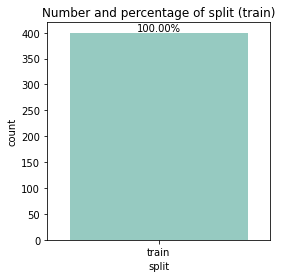

In [11]:
plot_count('split', 'split (train)', jsondata)

c:\users\shrim\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


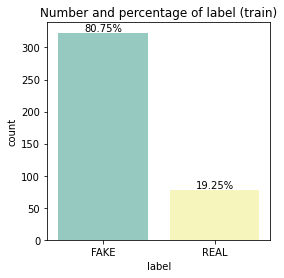

In [12]:
plot_count('label', 'label (train)', jsondata)

As we can see, the REAL are only 19.25% in train sample videos, with the FAKEs acounting for 80.75% of the samples.

Few fake videos

In [13]:
fake_train_sample_video = list(jsondata.loc[jsondata.label=='FAKE'].sample(3).index)
fake_train_sample_video

['ctzmavwror.mp4', 'acifjvzvpm.mp4', 'diomeixhrg.mp4']

In [14]:
def display_image_from_video(video_path):
    '''
    input: video_path - path for video
    process:
    1. perform a video capture from the video
    2. read the image
    3. display the image
    '''
    capture_image = cv.VideoCapture(video_path) 
    ret, frame = capture_image.read()
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111)
    frame = cv.cvtColor(frame, cv.COLOR_BGR2RGB)
    ax.imshow(frame)

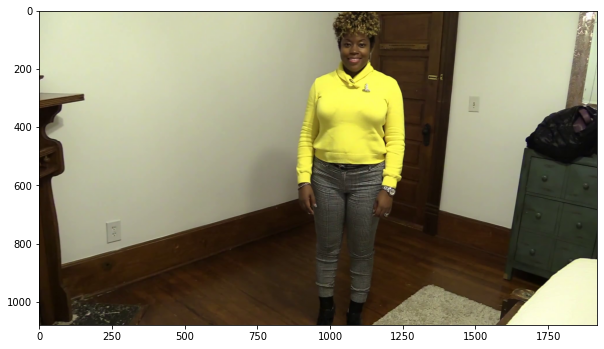

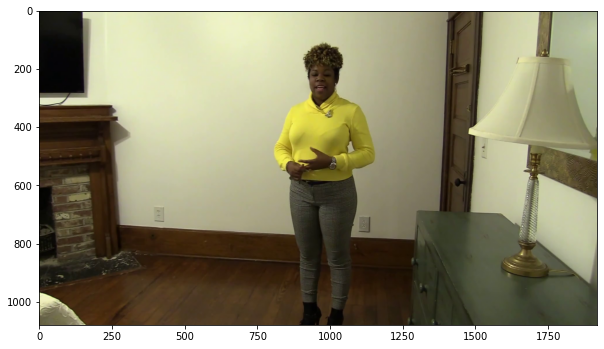

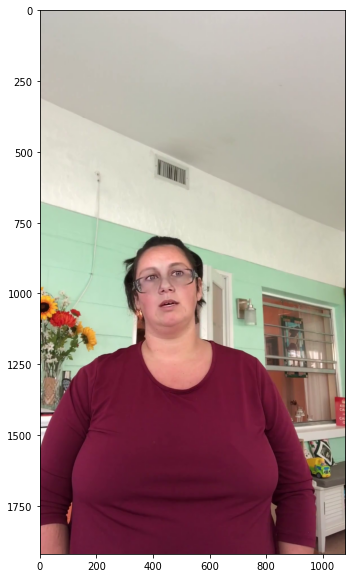

In [15]:
for fn in fake_train_sample_video:
    video_file = f'train_sample_videos/train_sample_videos/{fn}'
    display_image_from_video(video_file)

Few real videos

In [16]:
real_train_sample_video = list(jsondata.loc[jsondata.label=='REAL'].sample(3).index)
real_train_sample_video

['avmjormvsx.mp4', 'afoovlsmtx.mp4', 'dkzvdrzcnr.mp4']

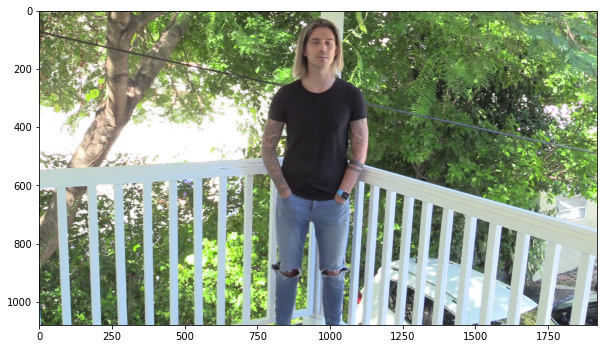

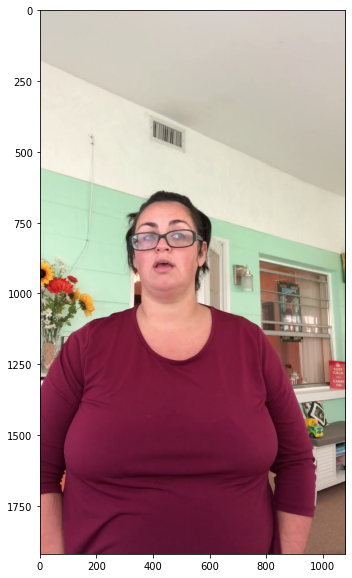

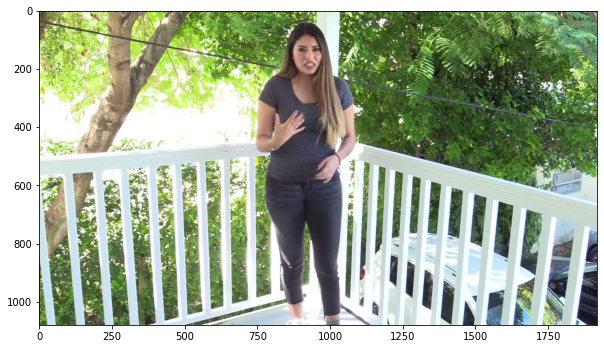

In [17]:
for fn in real_train_sample_video:
    video_file = f'train_sample_videos/train_sample_videos/{fn}'
    display_image_from_video(video_file)

In [18]:
jsondata['original'].value_counts()[0:5]

atvmxvwyns.mp4    6
meawmsgiti.mp4    6
qeumxirsme.mp4    5
kgbkktcjxf.mp4    5
fysyrqfguw.mp4    4
Name: original, dtype: int64

Test video files
Let's also look to few of the test data files

In [19]:
test_videos = pd.DataFrame(list(os.listdir('test_videos/test_videos')), columns=['video'])

In [20]:
test_videos.head()

video
0  aassnaulhq.mp4
1  aayfryxljh.mp4
2  acazlolrpz.mp4
3  adohdulfwb.mp4
4  ahjnxtiamx.mp4

Let's visualize now one of the videos.

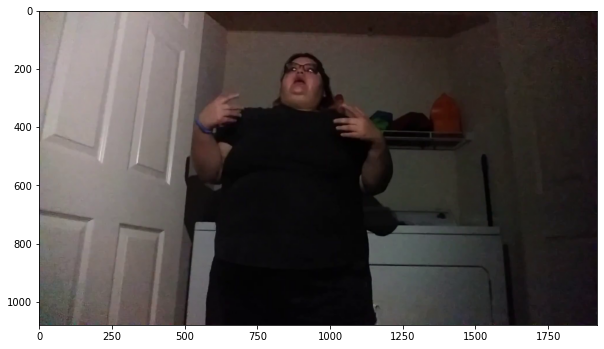

In [21]:
display_image_from_video(os.path.join('test_videos/test_videos', test_videos.iloc[0].video))

Let's look to some more videos from test set.

In [22]:
def display_image_from_video_list(video_path_list):
    '''
    input: video_path_list - path for video
    process:
    0. for each video in the video path list
        1. perform a video capture from the video
        2. read the image
        3. display the image
    '''
    plt.figure()
    fig, ax = plt.subplots(2,3,figsize=(16,8))
    # we only show images extracted from the first 6 videos
    for i, video_file in enumerate(video_path_list):
        video_path = os.path.join('test_videos/test_videos', video_path_list.iloc[i])
        capture_image = cv.VideoCapture(video_path) 
        ret, frame = capture_image.read()
        frame = cv.cvtColor(frame, cv.COLOR_BGR2RGB)
        ax[i//3, i%3].imshow(frame)
        ax[i//3, i%3].set_title(f"Video: {video_file}")
        ax[i//3, i%3].axis('on')

<Figure size 432x288 with 0 Axes>

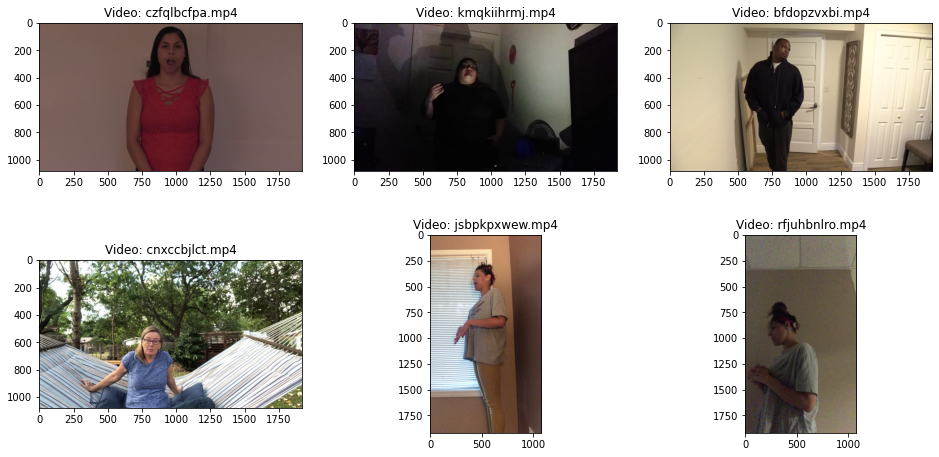

In [23]:
display_image_from_video_list(test_videos.sample(6).video)

# Face detection

I found 1 face(s) in this photograph.
A face is located at pixel location Top: 217, Left: 365, Bottom: 440, Right: 588


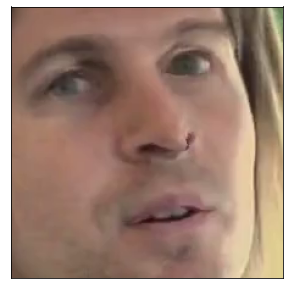

In [24]:
import face_recognition
import cv2 as cv
import os
import matplotlib.pylab as plt
from PIL import Image
train_dir = "train_sample_videos/train_sample_videos"
train_video_files = [train_dir + x for x in os.listdir(train_dir)]
video_file = train_video_files[30]
video_file = "train_sample_videos/train_sample_videos/aagfhgtpmv.mp4"
cap = cv.VideoCapture(video_file)
success, image = cap.read()
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
cap.release() 
face_locations = face_recognition.face_locations(image)

print("I found {} face(s) in this photograph.".format(len(face_locations)))

for face_location in face_locations:

    # Print the location of each face in this image
    top, right, bottom, left = face_location
    print("A face is located at pixel location Top: {}, Left: {}, Bottom: {}, Right: {}".format(top, left, bottom, right))
    # Access the actual face itself:
    face_image = image[top:bottom, left:right]
    fig, ax = plt.subplots(1,1, figsize=(5, 5))
    plt.grid(False)
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    ax.imshow(face_image)

# Frame by Frame Face Detection

In [25]:
import cv2
video_file = "p'svideo.mp4"

cap = cv2.VideoCapture(video_file)

frames = []
while(cap.isOpened()):
    ret, frame = cap.read()
    if ret==True:
        frames.append(frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break
cap.release()

print('The number of frames saved: ', len(frames))

The number of frames saved:  259


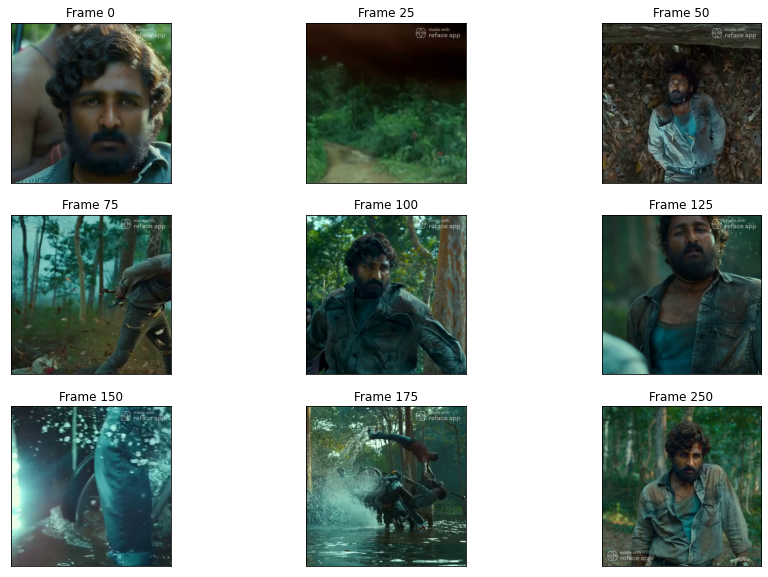

In [26]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))
axes = np.array(axes)
axes = axes.reshape(-1)

ax_ix = 0
for i in [0, 25, 50, 75, 100, 125, 150, 175, 250]:
    frame = frames[i]
    #fig, ax = plt.subplots(1,1, figsize=(5, 5))
    image = cv.cvtColor(frame, cv.COLOR_BGR2RGB)
    axes[ax_ix].imshow(image)
    axes[ax_ix].xaxis.set_visible(False)
    axes[ax_ix].yaxis.set_visible(False)
    axes[ax_ix].set_title(f'Frame {i}')
    ax_ix += 1
plt.grid(False)
plt.show()

Could not find face in frame 137
Could not find face in frame 175
Could not find face in frame 199


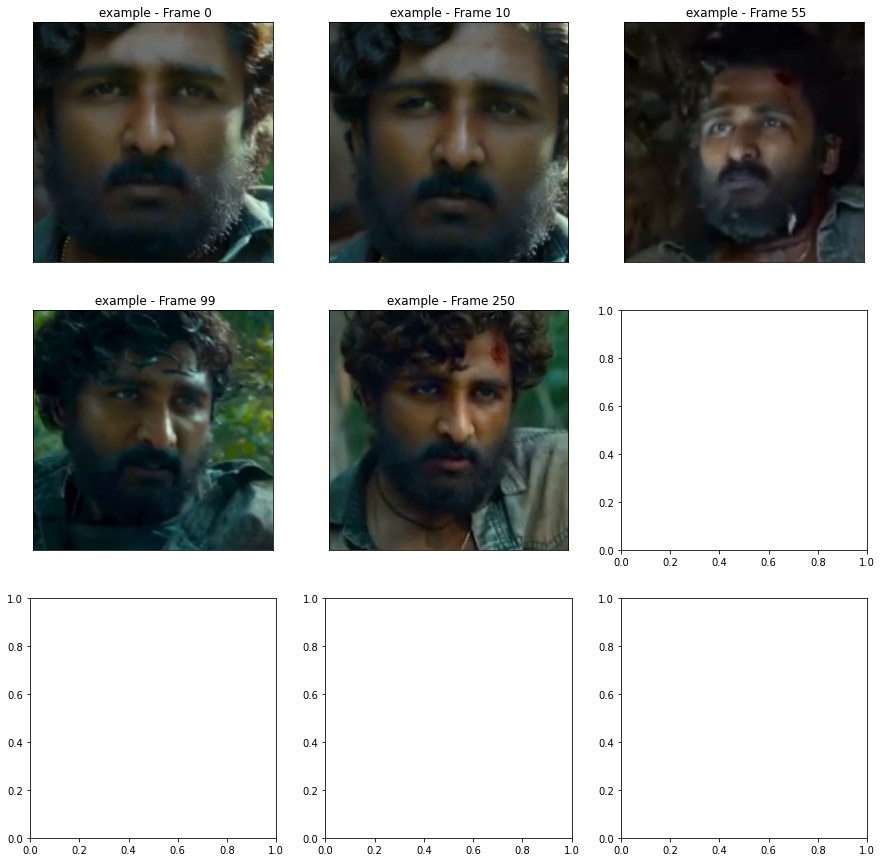

In [27]:
from pylab import *
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = np.array(axes)
axes = axes.reshape(-1)
ax_ix = 0
padding = 40
for i in [0,10, 55, 99, 137, 175, 199, 250]:
    frame = frames[i]
    #fig, ax = plt.subplots(1,1, figsize=(5, 5))
    face_locations = face_recognition.face_locations(frame)
    if len(face_locations) == 0:
        print(f'Could not find face in frame {i}')
        continue
    top, right, bottom, left = face_locations[0]
    frame_face = frame[top-padding:bottom+padding, left-padding:right+padding]
    image = cv.cvtColor(frame_face, cv.COLOR_BGR2RGB)
    axes[ax_ix].imshow(image)
    axes[ax_ix].grid(False)
    axes[ax_ix].set_title(f' example - Frame {i}')
    axes[ax_ix].xaxis.set_visible(False)
    axes[ax_ix].yaxis.set_visible(False)
    ax_ix += 1
    if ax_ix >= len(axes):
        break
plt.grid(False)
plt.show()

Could not identify face landmarks for frame 99
Count find face in frame 137
Count find face in frame 175
Count find face in frame 199


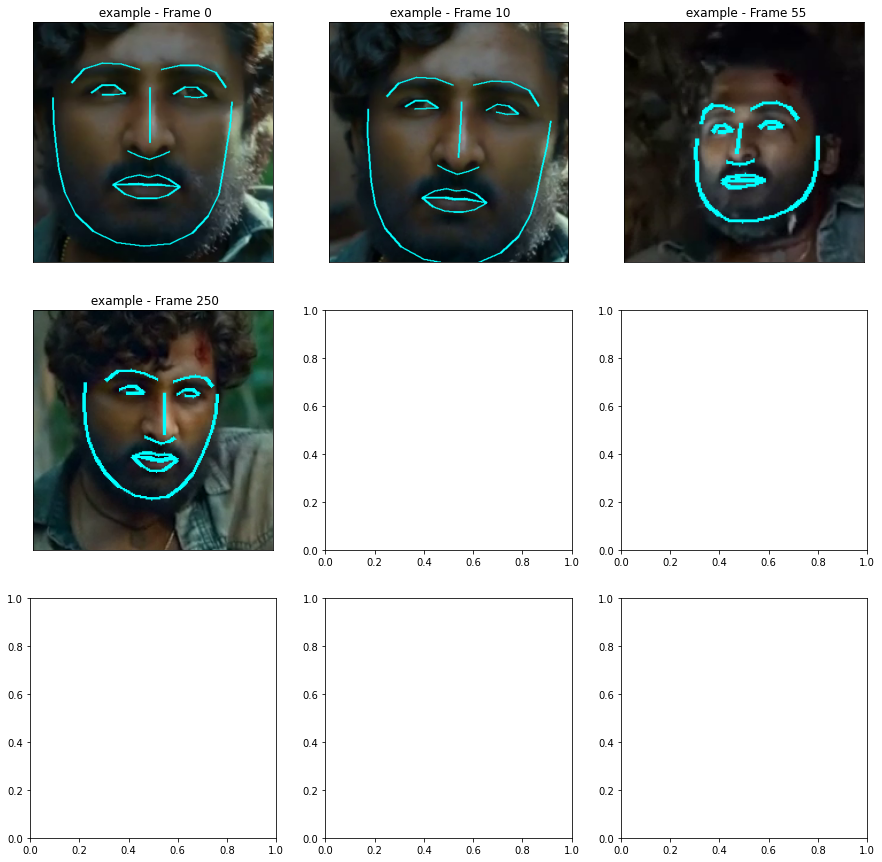

In [30]:
from PIL import Image, ImageDraw
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = np.array(axes)
axes = axes.reshape(-1)
ax_ix = 0
padding = 40
for i in [0,10, 55, 99, 137, 175, 199, 250]:
    frame = frames[i]
    #fig, ax = plt.subplots(1,1, figsize=(5, 5))
    face_locations = face_recognition.face_locations(frame)
    if len(face_locations) == 0:
        print(f'Count find face in frame {i}')
        continue
    top, right, bottom, left = face_locations[0]
    frame_face = frame[top-padding:bottom+padding, left-padding:right+padding]
    face_landmarks_list = face_recognition.face_landmarks(frame_face)
    if len(face_landmarks_list) == 0:
        print(f'Could not identify face landmarks for frame {i}')
        continue
    face_landmarks = face_landmarks_list[0]
    pil_image = Image.fromarray(frame_face)
    d = ImageDraw.Draw(pil_image)
    for facial_feature in face_landmarks.keys():
        d.line(face_landmarks[facial_feature], width=3, fill='yellow')
    landmark_face_array = np.array(pil_image)
    image = cv.cvtColor(landmark_face_array, cv.COLOR_BGR2RGB)
    axes[ax_ix].imshow(image)
    axes[ax_ix].grid(False)
    axes[ax_ix].set_title(f' example - Frame {i}')
    axes[ax_ix].xaxis.set_visible(False)
    axes[ax_ix].yaxis.set_visible(False)
    ax_ix += 1
    if ax_ix >= len(axes):
        break
plt.grid(False)
plt.show()

Locating a face within an image

In [31]:
face_landmarks_list = face_recognition.face_landmarks(image)

The chin in this face has the following points: [(45, 61), (45, 78), (46, 96), (49, 112), (55, 127), (65, 140), (76, 152), (88, 160), (103, 162), (117, 160), (127, 152), (136, 140), (144, 128), (150, 114), (155, 100), (158, 86), (159, 71)]
The left_eyebrow in this face has the following points: [(63, 62), (72, 55), (84, 53), (95, 56), (106, 61)]
The right_eyebrow in this face has the following points: [(121, 63), (131, 59), (141, 58), (150, 60), (155, 68)]
The nose_bridge in this face has the following points: [(113, 72), (113, 83), (113, 95), (113, 106)]
The nose_tip in this face has the following points: [(96, 108), (103, 110), (110, 113), (117, 111), (123, 109)]
The left_eye in this face has the following points: [(74, 69), (81, 65), (89, 65), (96, 72), (88, 73), (80, 72)]
The right_eye in this face has the following points: [(124, 73), (131, 68), (139, 68), (145, 72), (139, 75), (131, 75)]
The top_lip in this face has the following points: [(83, 126), (92, 119), (102, 117), (109, 1

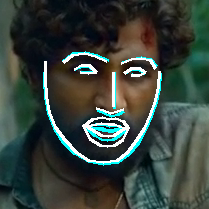

In [32]:
pil_image = Image.fromarray(image)
d = ImageDraw.Draw(pil_image)

for face_landmarks in face_landmarks_list:

    # Print the location of each facial feature in this image
    for facial_feature in face_landmarks.keys():
        print("The {} in this face has the following points: {}".format(facial_feature, face_landmarks[facial_feature]))

    # Let's trace out each facial feature in the image with a line!
    for facial_feature in face_landmarks.keys():
        d.line(face_landmarks[facial_feature], width=3)

# Show the picture
display(pil_image)


Add padding to zoom out of face

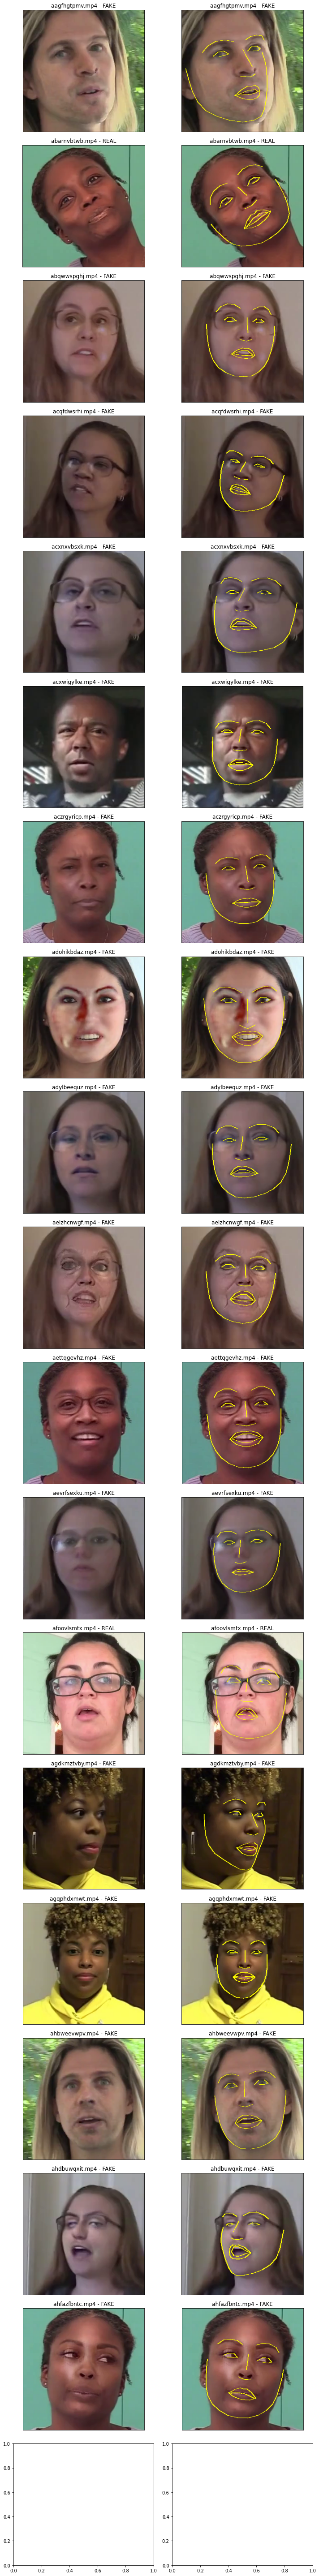

In [33]:
from PIL import Image, ImageDraw

fig, axs = plt.subplots(19, 2, figsize=(10, 80))
axs = np.array(axs)
axs = axs.reshape(-1)
i = 0
pad = 60 #pad is addded to the plot to zoom out of the face
for fn in jsondata.index[:24]:
    label = jsondata.loc[fn]['label']
    orig =  jsondata.loc[fn]['label']
    #train_dir = f'train_sample_videos/train_sample_videos/{fn}'
    video_file = f'train_sample_videos/train_sample_videos/{fn}'
    ax = axs[i]
    cap = cv.VideoCapture(video_file)
    success, image = cap.read()
    image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    face_locations = face_recognition.face_locations(image)
    if len(face_locations) > 0:
        # Print first face
        face_location = face_locations[0]
        top, right, bottom, left = face_location
        face_image = image[top-pad:bottom+pad, left-pad:right+pad]
        ax.imshow(face_image)
        ax.grid(False)
        ax.title.set_text(f'{fn} - {label}')
        ax.xaxis.set_visible(False)
        ax.yaxis.set_visible(False)
        # Find landmarks
        face_landmarks_list = face_recognition.face_landmarks(face_image)
        if len(face_landmarks_list) > 0:
            face_landmarks = face_landmarks_list[0]
            pil_image = Image.fromarray(face_image)
            d = ImageDraw.Draw(pil_image)
            for facial_feature in face_landmarks.keys():
                d.line(face_landmarks[facial_feature], width=2, fill='yellow')
            landmark_face_array = np.array(pil_image)
            ax2 = axs[i+1]
            ax2.imshow(landmark_face_array)
            ax2.grid(False)
            ax2.title.set_text(f'{fn} - {label}')
            ax2.xaxis.set_visible(False)
            ax2.yaxis.set_visible(False)
            i += 2
plt.grid(False)
plt.tight_layout()
plt.show()


In [34]:
%%capture
#Install facenet-pytorch
%pip install //input/facenet-pytorch-vggface2/facenet_pytorch-1.0.1-py3-none-any.whl

# Copy model checkpoints to torch cache so they are loaded automatically by the package
!mkdir -p /tmp/.cache/torch/checkpoints/
!cp //input/facenet-pytorch-vggface2/20180402-114759-vggface2-logits.pth /tmp/.cache/torch/checkpoints/vggface2_DG3kwML46X.pt
!cp //input/facenet-pytorch-vggface2/20180402-114759-vggface2-features.pth /tmp/.cache/torch/checkpoints/vggface2_G5aNV2VSMn.pt


In [35]:
import os
import glob
import torch
import cv2
from PIL import Image
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from facenet_pytorch import MTCNN, InceptionResnetV1

device = 'cuda:0' if torch.cuda.is_available() else 'cpu' #checks if GPY is being used or the CPU
print(f'Running on device: {device}')


Running on device: cpu


c:\users\shrim\appdata\local\programs\python\python39\lib\site-packages\torch\cuda\__init__.py:82: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 9010). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at  C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\c10\cuda\CUDAFunctions.cpp:112.)
  return torch._C._cuda_getDeviceCount() > 0


In [36]:
# Load face detector
mtcnn = MTCNN(device=device).eval()

# Load facial recognition model
resnet = InceptionResnetV1(pretrained='vggface2', num_classes=2, device=device).eval()


In [37]:
# Get all test videos
filenames = glob.glob("test_videos/test_videos/*.mp4")

In [38]:
filenames = filenames[2:5]

# Number of frames to sample (evenly spaced) from each video
n_frames = 10

X = []
with torch.no_grad():
    for i, filename in enumerate(filenames):
        print(f'Processing {i+1:5n} of {len(filenames):5n} videos\r', end='')
        
        try:
            # Create video reader and find length
            v_cap = cv2.VideoCapture(filename)
            v_len = int(v_cap.get(cv2.CAP_PROP_FRAME_COUNT))
            
            # Pick 'n_frames' evenly spaced frames to sample
            sample = np.linspace(0, v_len - 1, n_frames).round().astype(int)
            imgs = []
            for j in range(v_len):
                success, vframe = v_cap.read()
                vframe = cv2.cvtColor(vframe, cv2.COLOR_BGR2RGB)
                if j in sample:
                    imgs.append(Image.fromarray(vframe))
            v_cap.release()
            
            # Pass image batch to MTCNN as a list of PIL images
            faces = mtcnn(imgs)
            
            # Filter out frames without faces
            faces = [f for f in faces if f is not None]
            faces = torch.stack(faces).to(device)
            
            # Generate facial feature vectors using a pretrained model
            embeddings = resnet(faces)
            
            # Calculate centroid for video and distance of each face's feature vector from centroid
            centroid = embeddings.mean(dim=0)
            X.append((embeddings - centroid).norm(dim=1).cpu().numpy())
        except KeyboardInterrupt:
            raise Exception("Stopped.")
        except:
            X.append(None)


c:\users\shrim\appdata\local\programs\python\python39\lib\site-packages\torch\nn\functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
c:\users\shrim\appdata\local\programs\python\python39\lib\site-packages\facenet_pytorch\models\utils\detect_face.py:183: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  batch_boxes, batch_points = np.array(batch_boxes), np.array(batch_points)
c:\users\shrim\appdata\local\programs\python\python39\lib\site-packages\facenet_pytorch\models\mtcnn.py:339: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a 

In [39]:
bias = -0.4
weight = 0.068235746

submission = []
for filename, x_i in zip(filenames, X):
    if x_i is not None and len(x_i) == 10:
        prob = 1 / (1 + np.exp(-(bias + (weight * x_i).sum())))
    else:
        prob = 0.6
    submission.append([os.path.basename(filename), prob])


In [40]:
submission = pd.DataFrame(submission, columns=['filename', 'label'])
submission.sort_values('filename').to_csv('submission.csv', index=False)

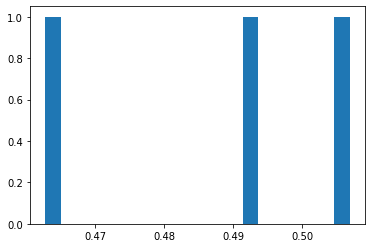

filename     label
0  acazlolrpz.mp4  0.492214
1  adohdulfwb.mp4  0.462779
2  ahjnxtiamx.mp4  0.506911

In [41]:
plt.hist(submission.label, 20)
plt.show()
submission